In [3]:
# Import yfinance library
import yfinance as yf


# Define the start and end dates  
start_date = '2024-04-01'
end_date   = '2024-05-01'

# Define the list of tickers
tickers = ['AAPL', 'MSFT']

# Download historical prices for the list of tickers
historical_prices = yf.download(tickers, start=start_date, end=end_date)

historical_prices.head()

In [ ]:
import pandas as pd
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]
# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

In [ ]:
# Define the start and end dates  
start_date = '2000-01-01'
end_date   = '2024-05-01'

# Download historical prices for the list of tickers
historical_prices = yf.download(sp500_tickers, start=start_date, end=end_date)

In [ ]:
# Filter and keep only columns where the first level of the MultiIndex is 'Adj Close'
historical_prices  = historical_prices.loc[:, historical_prices.columns.get_level_values(0) == 'Adj Close']
historical_prices.columns = historical_prices.columns.droplevel(0)   
historical_prices.head()


In [ ]:
MIN_REQUIRED_NUM_OBS_PER_TICKER = 100

# Count non-missing values for each ticker
ticker_counts = historical_prices.count()
ticker_counts

In [ ]:
ticker_counts[ticker_counts<MIN_REQUIRED_NUM_OBS_PER_TICKER]

In [ ]:
# Filter out tickers with fewer than n=MIN_REQUIRED_NUM_OBS_PER_TICKER=100 non-missing values
valid_tickers_mask = ticker_counts[ticker_counts >= MIN_REQUIRED_NUM_OBS_PER_TICKER].index
# Filter the DataFrame based on valid tickers
historical_prices = historical_prices[valid_tickers_mask]

In [ ]:
import sys
import os
# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))

# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
historical_prices = func_lib.createHistPrices()

# DEMO 2

In [ ]:
import sys
import os
# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))

# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd

In [ ]:
historical_prices = func_lib.createHistPrices()

In [ ]:
# Create a function called 'computingReturns' that takes  prices and a list of integers (momentums) as an input
def computingReturns(historical_prices, list_of_momentums): 
    '''
    Takes as an input a dataframe of prices and a list of momentums 
    and returns a dataframe with returns over the momentum list and 1 day forward returns
    '''

    # Return the total returns DataFrame
    return total_returns


In [ ]:
# Initialize the forecast horizon
forecast_horizon = 1
# Compute forward returns by taking percentage change of close prices
f_returns = historical_prices.pct_change(forecast_horizon, fill_method=None)
f_returns.iloc[:,0:10].head()

In [ ]:

f_returns[['AAPL']].head()

prices[['AAPL']].head()

In [ ]:

# We then shift the forward returns
f_returns = f_returns.shift(-forecast_horizon)
f_returns.iloc[:,0:10].head()


In [ ]:
# Pivot the dataframe
f_returns = pd.DataFrame(f_returns.unstack())
# Name the column based on the forecast horizon
name = "F_" + str(forecast_horizon) + "_d_returns"
f_returns.rename(columns={0: name}, inplace=True)
f_returns.head()

In [ ]:

# Initialize total_returns with forward returns
total_returns = f_returns

In [ ]:
# Iterate over the list of momentum values
for i in list_of_momentums:   
    # Compute returns for each momentum value
    feature = historical_prices.pct_change(i)
    feature = pd.DataFrame(feature.unstack())
    # Name the column based on the momentum value
    name = str(i) + "_d_returns"        
    feature.rename(columns={0: name}, inplace=True)
    # Rename columns and reset index
    feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
    # Merge computed feature returns with total_returns based on Ticker and Date
    total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')

In [ ]:
# Drop rows with any NaN values
total_returns.dropna(axis=0, how='any', inplace=True) 
total_returns.head()

## DEMO 3

In [1]:
import sys
import os
# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))

# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd

ModuleNotFoundError: No module named 'func_lib'

In [2]:
historical_prices = func_lib.createHistPrices()
list_of_momentums = [1]
total_returns     = func_lib.computingReturns(historical_prices, list_of_momentums)

NameError: name 'func_lib' is not defined

In [ ]:

total_returns.index.get_level_values('Ticker').nunique()

total_returns.index.get_level_values('Date').value_counts().describe()

In [ ]:
# How many tickers do we have at each date?
tickers_per_date = total_returns.index.get_level_values('Date').value_counts()
tickers_per_date

In [ ]:
import matplotlib.pyplot as plt
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Tickers per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

In [4]:
pd.options.display.float_format = "{:,.4f}".format
total_returns.describe()

NameError: name 'pd' is not defined

In [5]:
def compute_BM_Perf(total_returns):
    """ computes benchmark performance for investment universe and returns cumulative and calendar returns"""
    

    return cum_returns, calendar_returns

In [ ]:
def compute_BM_Perf(total_returns):
    # Compute the daily mean of all stocks. This will be our equal weighted benchmark
    daily_mean  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
    daily_mean.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)
    
    # Convert daily returns to cumulative returns
    cum_returns = pd.DataFrame((daily_mean[['SP&500']]+1).cumprod())
    
    # Plotting the cumulative returns
    cum_returns.plot()
    
    # Customizing the plot
    plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Cumulative Return', fontsize=14)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title_fontsize='13', fontsize='11')
    
    # Display the plot
    plt.show()
    
    # Calculate the number of years in the dataset
    number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year
    
    ending_value    = cum_returns['SP&500'].iloc[-1]
    beginning_value = cum_returns['SP&500'].iloc[1]
    
    # Compute the Compound Annual Growth Rate (CAGR)
    ratio = ending_value/beginning_value
    cagr = round((ratio**(1/number_of_years)-1)*100,2)
    print(f'The CAGR is: {cagr}%')
    
    # Compute the Sharpe Ratio by annualizing the daily mean and the daily std
    average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
    stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)
    
    sharpe  = average_daily_return/stand_dev_dail_return
    
    print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')
    
    
    #df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
    ann_returns = (pd.DataFrame((daily_mean[['SP&500']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
    calendar_returns  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean.index.get_level_values(0).year).last())
    
    calendar_returns.plot.bar(rot=30,  legend='top_left')#.opts(multi_level=False) 

    return cum_returns, calendar_returns


# DEMO 4

In [11]:
import sys
import os
# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))

# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'func_lib'

In [ ]:
historical_prices = func_lib.createHistPrices()
list_of_momentums = [1]
total_returns     = func_lib.computingReturns(historical_prices, list_of_momentums)

In [ ]:
def calculate_rsi(returns, window=14):        

    return rsi

In [ ]:
returns = total_returns['1_d_returns']
returns = returns[returns.index.get_level_values(0)=='AAPL']

In [10]:
window = 2

In [ ]:
gain = returns[returns>0].dropna().rolling(window=window).mean()
gain.name = 'gain'
loss = returns[returns<0].dropna().rolling(window=window).mean()
loss.name = 'loss'

In [ ]:
returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')
returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')

In [ ]:
returns.head(5)

In [ ]:
returns = returns.ffill()
returns.dropna(inplace=True)

In [ ]:
ratio = returns['gain']/abs(returns['loss'])
rsi = 100 - (100 / (1 + ratio))

In [9]:
def calculate_rsi(returns, window=14):    
    gain = returns[returns>0].dropna().rolling(window=window).mean()
    gain.name = 'gain'
    loss = returns[returns<0].dropna().rolling(window=window).mean()
    loss.name = 'loss'
    returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')
    returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
    returns = returns.ffill()
    returns.dropna(inplace=True)
    ratio = returns['gain']/abs(returns['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [ ]:
# Calculate RSI for each ticker separately and add to the DataFrame
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(calculate_rsi)

In [9]:
# Customizing the histogram
histogram_plot = total_returns[['RSI']].hist(bins=50, ax=plt.gca(), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Relative Strength Index (RSI)', fontsize=16, fontweight='bold')
plt.xlabel('RSI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True) 
plt.show()

In [10]:
scatter_plot = total_returns.plot.scatter(x='RSI', y='F_1_d_returns', ax=plt.gca(), color='blue', alpha=0.6,s=0.01)

# Adding titles and labels
plt.title('RSI vs. 1-Day Forward Returns', fontsize=16, fontweight='bold')
plt.xlabel('Relative Strength Index (RSI)', fontsize=14)
plt.ylabel('1-Day Forward Returns', fontsize=14)
plt.grid(True)
plt.show()

In [8]:
total_returns[['F_1_d_returns', 'RSI']].corr().style.background_gradient()

NameError: name 'total_returns' is not defined

In [ ]:
feature = 'RSI'
target = 'F_1_d_returns'

# Specify custom bin boundaries
bin_boundaries = [0, 30, 70, 100]

total_returns['Quantiles'] = total_returns.groupby(level='Date')[feature].transform(lambda x: pd.cut(x, bins=bin_boundaries, labels=False, precision=0, duplicates='drop'))

total_returns.groupby('Quantiles')[[target]].mean().plot(kind='bar', legend=True)

In [ ]:
total_returns[total_returns['RSI']<30].describe()

# DEMO 5

In [12]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 30:
        return  1 # Go long
    else:
        return 0
model_name = "RSI"
cum_returns, calendar_returns = func_lib.compute_BM_Perf(total_returns)
cum_returns, calendar_returns = func_lib.compute_Strat_Perf(total_returns, cum_returns, calendar_returns, trading_strategy, model_name)

NameError: name 'func_lib' is not defined

In [ ]:
def compute_strat_perf(total_returns, cum_returns, calendar_returns, trading_strategy, model_name):    
    return cum_returns, calendar_returns

In [ ]:

def compute_Strat_Perf(total_returns, cum_returns, calendar_returns, trading_strategy, model_name):    
    # Apply trading strategy to each RSI value
    total_returns['Position'] = total_returns[model_name].transform(trading_strategy)
    # Create Returns for each Trade
    total_returns[f'{model_name}_Return'] = total_returns['F_1_d_returns'] *  total_returns['Position'] 
    
    # Compute the daily mean of all stocks. This will be our equal weighted benchmark
    daily_mean  = pd.DataFrame(total_returns.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())
    
    # Convert daily returns to cumulative returns
    cum_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

    # Plotting the cumulative returns
    cum_returns.plot()
    
    # Customizing the plot
    plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Cumulative Return', fontsize=14)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title_fontsize='13', fontsize='11')
    
    # Display the plot
    plt.show()
    
    # Calculate the number of years in the dataset
    number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year
    
    ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
    beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]
    
    ratio = ending_value/beginning_value
    # Compute the Compound Annual Growth Rate (CAGR)
    cagr = round((ratio**(1/number_of_years)-1)*100,2)
    
    print(f'The CAGR is: {cagr}%')
    
    # Compute the Sharpe Ratio by annualizing the daily mean and the daily std
    average_daily_return  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
    stand_dev_dail_return   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)
    
    # Compute the Sharpe Ratio and print it out
    sharpe  = average_daily_return/stand_dev_dail_return
    
    print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')
    
    ann_returns = (pd.DataFrame((daily_mean[f'{model_name}_Return']+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
    
    
    calendar_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
    
    calendar_returns.plot.bar(rot=30,  legend='top_left')#.opts(multi_level=False) 
    return cum_returns, calendar_returns

In [ ]:
trades = total_returns[total_returns['Position']==1]
tickers_per_date =trades.index.get_level_values('Date').value_counts()
tickers_per_date.describe()

In [ ]:


tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Trades per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plotting the cumulative returns
cum_returns['RSI_Return'].plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [5]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for S&P 500
stock_ticker = 'SPY'

# Download historical data for S&P 500 since 1980
stock_data = yf.download(stock_ticker, start='1980-01-01', end='2024-01-01')['Adj Close']

# Download historical data for 10-Year Treasury Bond from FRED
bond_data = web.DataReader('DGS10', 'fred', start='1980-01-01', end='2024-01-01')



[*********************100%%**********************]  1 of 1 completed


In [70]:
# Resample bond data to match the frequency of stock data (daily) and forward fill missing values
#bond_data = bond_data.resample('D').ffill()

# Calculate the daily returns for both stock and bond data
stock_returns = stock_data.pct_change().dropna()
bond_returns = bond_data.pct_change().dropna()



C:\Users\metin\AppData\Local\Temp\ipykernel_16032\1504623157.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  bond_returns = bond_data.pct_change().dropna()


In [72]:
# Combine the data into a single DataFrame
returns = pd.merge(pd.DataFrame(stock_returns), bond_returns, left_index=True, right_index=True)
returns.rename(columns={'Adj Close': 'SP500', 'DGS10': '10Y_Treasury'}, inplace=True)



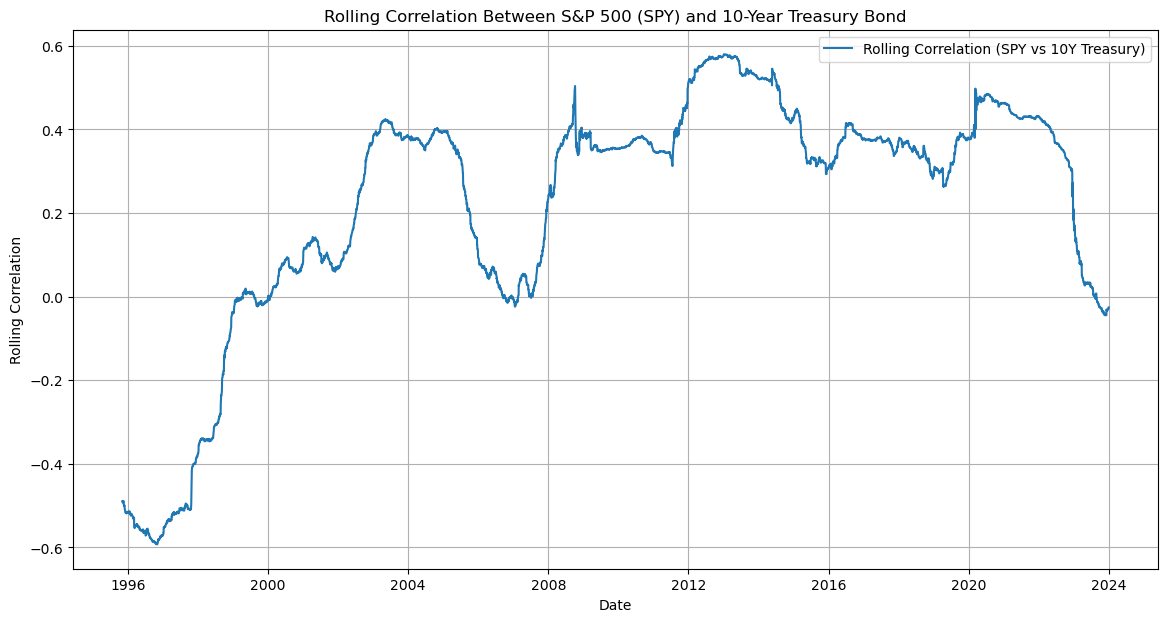

In [74]:
# Calculate the rolling correlation with a window of 252 trading days (approximately 1 year)
rolling_corr = returns['SP500'].rolling(window=700).corr(returns['10Y_Treasury'])

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, label='Rolling Correlation (SPY vs 10Y Treasury)')
plt.title('Rolling Correlation Between S&P 500 (SPY) and 10-Year Treasury Bond')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  2 of 2 completed


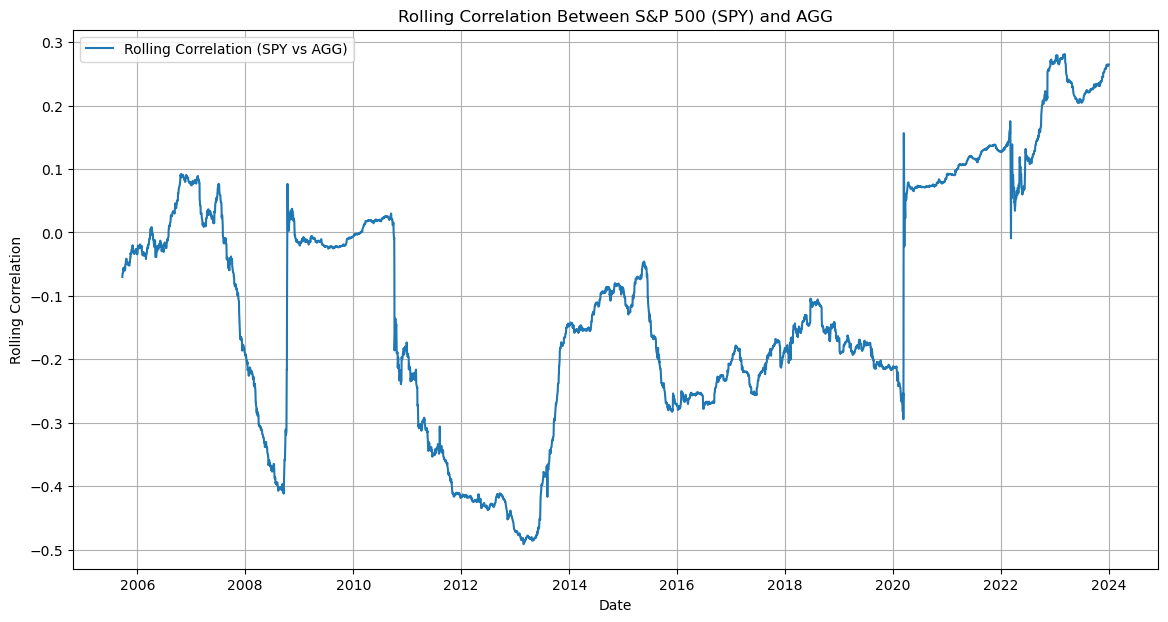

In [76]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbols for S&P 500 and AGG
tickers = ['SPY', 'AGG']

# Download historical data since 1980
data = yf.download(tickers, start='1980-01-01', end='2024-01-01')['Adj Close']

# Calculate the daily returns
returns = data.pct_change().dropna()

# Calculate the rolling correlation with a window of 252 trading days (approximately 1 year)
rolling_corr = returns['SPY'].rolling(window=500).corr(returns['AGG'])

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, label='Rolling Correlation (SPY vs AGG)')
plt.title('Rolling Correlation Between S&P 500 (SPY) and AGG')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-04-01  169.603378  423.043060  170.029999  424.570007  171.250000   
2024-04-02  168.416351  419.924347  168.839996  421.440002  169.339996   
2024-04-03  169.224319  418.937897  169.649994  420.450012  170.679993   
2024-04-04  168.396423  416.377136  168.820007  417.880005  171.919998   
2024-04-05  169.154495  423.989624  169.580002  425.519989  170.389999   

Price                          Low                    Open              \
Ticker            MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2024-04-01  427.890015  169.479996  422.220001  171.190002  423.950012   
2024-04-02  422.380005  168.229996  417.839996  169.080002  420.109985   
2024-04-03  423.260010  168.580002  419.089996  168.789993  419.730011   
2024-04-04  428.670013  168.820007  417.570007  170.289993  424.989990   
2024-04-05  426.510010  168.949997  418.320007  169.589996  420.010010   

Price         Volume            
Ticker          AAPL      MSFT  
Date                            
2024-04-01  46240500  16316000  
2024-04-02  49329500  17912000  
2024-04-03  47691700  16502300  
2024-04-04  53704400  19370900  
2024-04-05  42055200  16544300

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

[*********************100%%**********************]  501 of 501 completed

1 Failed download:
['SW']: YFChartError("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1714536000")


count   4,559.0000
mean        3.4920
std         5.1254
min         1.0000
25%         1.0000
50%         2.0000
75%         4.0000
max       111.0000
Name: count, dtype: float64

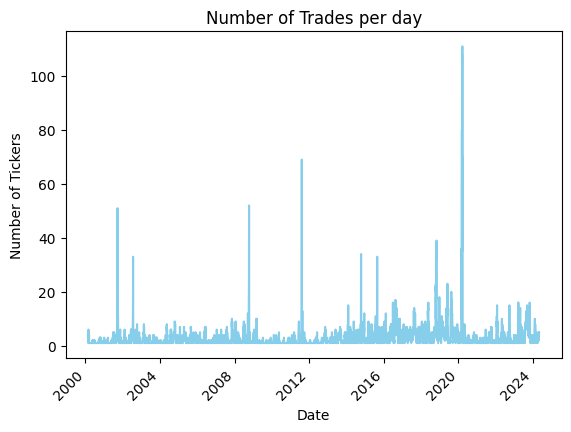

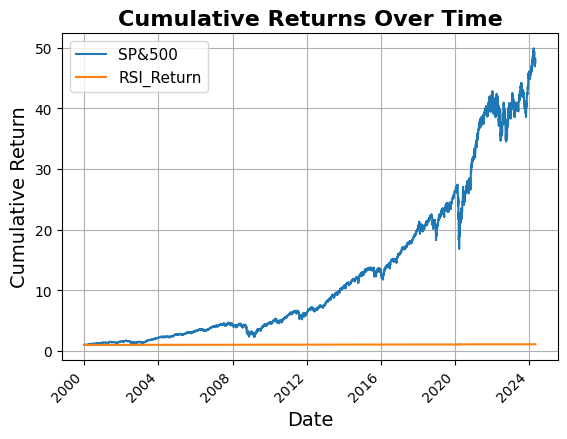

In [108]:
cum_returns.plot()
# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

# DEMO 6


In [13]:
# Create the predicted and true values of F_1_d_returns as being larger or smaller than 0
total_returns['y_test'] = np.where(total_returns['F_1_d_returns']>0,1,0)
total_returns['y_pred'] = total_returns['Position']

# Define actual ansd predicted signals as lists
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()


NameError: name 'np' is not defined

In [776]:
# Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})

metrics_df

,Metric,Value
0,Accuracy,0.4866
1,Precision,0.5300
2,Recall,0.0061


In [779]:
# Count the number of each class
counts = total_returns['y_test'].value_counts()

# Calculate the share of each class
total = counts.sum()
shares = counts / total * 100
shares

y_test
1   51.3791
0   48.6209
Name: count, dtype: float64

In [113]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 60:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
total_returns['Position'] = total_returns[model_name].transform(trading_strategy)
# Create Returns for each Trade
total_returns[f'{model_name}_Return'] = total_returns['F_1_d_returns'] *  total_returns['Position'] 


In [114]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI  Position  RSI_Return
Ticker Date                                                             
A      2000-01-05        -0.0381      -0.0620  NaN         0     -0.0000
       2000-01-06         0.0833      -0.0381  NaN         0      0.0000
       2000-01-07         0.0606       0.0833  NaN         0      0.0000
       2000-01-10        -0.0136       0.0606  NaN         0     -0.0000
       2000-01-11        -0.0202      -0.0136  NaN         0     -0.0000

In [115]:
# Define trading strategy based on RSI
def trading_strategy(rsi):
    if rsi < 30:
        return  1 # Go long
    else:
        return 0
        

# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

ann_returns = (pd.DataFrame((daily_mean[f'{model_name}_Return']+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100


calendar_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

The CAGR is: 14.98%
Sharpe Ratio of Strategy: 0.84


:Bars   [Date,Variable]   (value)

<Axes: xlabel='Date'>

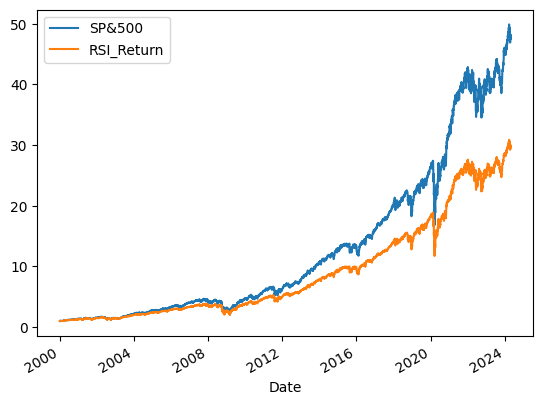

In [117]:
cum_returns.plot()

In [818]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI  Quantiles  Position  \
Ticker Date                                                               
A      2000-01-05        -0.0381      -0.0620  NaN        NaN         0   
       2000-01-06         0.0833      -0.0381  NaN        NaN         0   
       2000-01-07         0.0606       0.0833  NaN        NaN         0   
       2000-01-10        -0.0136       0.0606  NaN        NaN         0   
       2000-01-11        -0.0202      -0.0136  NaN        NaN         0   

                   RSI_Return  y  y_pred  y_test  
Ticker Date                                       
A      2000-01-05     -0.0000  0       0       0  
       2000-01-06      0.0000  1       0       1  
       2000-01-07      0.0000  1       0       1  
       2000-01-10     -0.0000  0       0       0  
       2000-01-11     -0.0000  0       0       0

In [829]:
# Create the predicted and true values of F_1_d_returns as being larger or smaller than 0
total_returns['y_test'] = np.where(total_returns['F_1_d_returns']>0,1,0)
total_returns['y_pred'] = total_returns['Position']

# Define actual ansd predicted signals as lists
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})

metrics_df

,Metric,Value
0,Accuracy,0.5125
1,Precision,0.5154
2,Recall,0.8541
